# Árvores de Decisão
## Aula 4

### Como árvores de decisão são usadas para classificação?

* Dada uma tupla, `X`, para a qual não se conhece o valor do rótulo (classe), os valores
dos atributos na tupla são testados na (através da) árvore de decisão. 
* Um caminho é traçado a partir da raíz até um nó folha, o qual tem a predição de classe para aquela
tupla. 
* Arvores de decisão podem ser facilmente convertidas em regras de classificação. 

### Por que as árvores de decisão são tão populares?

* Sua construção não exige conhecimento sobre o domínio, ou determinação (calibração) de parâmetros;
* O conhecimento construído na árvore é altamente acessível
* Os passos de indução e classificação são rápidos;
* Em geral tem boa acurácia


### Algoritmos para indução de árvores de decisão:

* Ganho de informação
* Raio do ganho de informação
* Índice de Gini

<a><img src = "https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png" width = 400, align = "center"></a>

## Entropia

* A entropia é uma grandeza termodinâmica que mede o grau de irreversibilidade
de um sistema. 
    - E comumente associada ao que se entende por “desordem” de um sistema termodinâmico.
* **É o grau de incerteza de uma informação.**


* Baixa entropia

<a><img src = "http://cafejandaia.com.br/conteudo-img/imagem-2018-06-05-15282179047907.jpg" width = 500, align = "center"></a>


* Alta entropia

<a><img src = "https://static.clubedaanamariabraga.com.br/wp-content/uploads/2019/03/po-de-cappuccino-1024x576.jpg" width = 500, align = "center"></a>

### Discretização baseada em Entropia

Dado um ponto da partição da árvore:

$$
\text{Info}_A(D) = \frac{|D_1|}{|D|} \text{Entropy}(D_1) + \frac{|D_2|}{|D|} \text{Entropy}(D_2)
$$

* Representação em relação à quantidade de elementos


$$
\text{Entropy}(D_1) = - \sum_{i=1}^m p_i \log_2 (p_i)
$$

* $p_i$ é a probabilidade da classe $C_i$ em $D_1$



* o processo de determinar o ponto de divisão é recursivamente aplicado para cada partição obtida, até algum critério de parada
ser alcançado 


$$
\text{Entropy} = -p(A) \log_2(p(A)) - p(B) \log_2(p(B))
$$

* Entropia 1 significa a mesma divisão dos dados, não tem como tirar conclusões
* Entropia 0 significa que só há objetos do mesmo tipo na divisão dos dados
* o processo de determinar o ponto de divisão é recursivamente aplicado para cada partição obtida, até algum critério de parada
ser alcançado 

In [2]:
import numpy as np

In [3]:
def Entropy(pA, pB):
    return -pA* np.log2(pA) - pB * np.log2(pB)

In [4]:
# Drug
Entropy(5/14, 9/14)

0.9402859586706311

In [5]:
# Cholesterol - Normal
Entropy(2/8, 6/8)

0.8112781244591328

## Ganho de informação

* Minimiza a informação necessária para classificar os dados das partições resultantes e reflete a impureza ou a aleatoriedade das partições. 
* A abordagem é minimizar a quantidade de informação necessária para discriminar os dados a partir da existência da partição.

$$
\text{Gain}(A) = \text{Info}(D) - \text{Info}_A(D)
$$

$$
\text{Ganho de informação} = \text{(Entropia antes da divisão)} - \text{(Entropia ponderada depois da divisão)}
$$

* Ponderada pela quantidade de dados de cada lado da divisão


## Índice Gini

* Mede a impureza $D$ de uma partição de dados

$$
\text{Gini}(D) = 1 - \sum_{i=1}^m p_i^2
$$

* $p_i$ é a probabilidade da tupla em $D$ pertencer à classe $C_i$





Ao se realizar uma partição binária no atributo A, particionando D em $D_1$ e $D_2$:

$$
\text{Gini}_A(D) = \frac{|D_1|}{|D|} \text{Gini}(D_1) + \frac{|D_2|}{|D|} \text{Gini}(D_2)
$$

A redução de impureza se o atributo $A$ é usado para particionar o conjunto:
$$
\Delta \text{Gini}A = \text{Gini}(D) - \text{Gini}_A(D)
$$

* O atributo que maximiza a redução de impureza é escolhido como atributo de divisão do conjunto.

In [6]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)

### Impureza Gini

$$
G(t) = 1 - \sum_{i=1}^c p_i^2
$$

* nó $t$
* $p_i$ é a proporção de observações da classe c no nó t.
* Busca-se encontrar as regras de decisão para criar divisões com base na impureza, de maneira recursiva até que todos as folhas sejam puras.

In [7]:
# Make new observation
observation = [[ 5, 4, 3, 2]]
# Predict observation's class
model.predict(observation)

array([1])

In [8]:
# View predicted class probabilities for the three classes
model.predict_proba(observation)

array([[0., 1., 0.]])

In [9]:
# Create decision tree classifier object using entropy
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Train model
model_entropy = decisiontree_entropy.fit(features, target)

### Regresão usando a árvore de decisão

In [10]:
# Load libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

# Load data with only two features
boston = datasets.load_boston()
features = boston.data[:,0:2]
target = boston.target

# Create decision tree classifier object
decisiontree = DecisionTreeRegressor(random_state=0)

# Train model
model = decisiontree.fit(features, target)

C:\Users\307145\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2
$$

* $y_i$ é o valor real
* $\hat{y}_i$ é o valor estimado

In [11]:
# Make new observation
observation = [[0.02, 16]]

# Predict observation's value
model.predict(observation)

array([33.])

In [12]:
# Create decision tree classifier object using entropy
decisiontree_mae = DecisionTreeRegressor(criterion="mae", random_state=0)

# Train model
model_mae = decisiontree_mae.fit(features, target)

C:\Users\307145\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


In [13]:
# Load libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)

In [14]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names) # Converter de dataframe do sklearn para Pandas
df['target'] = target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


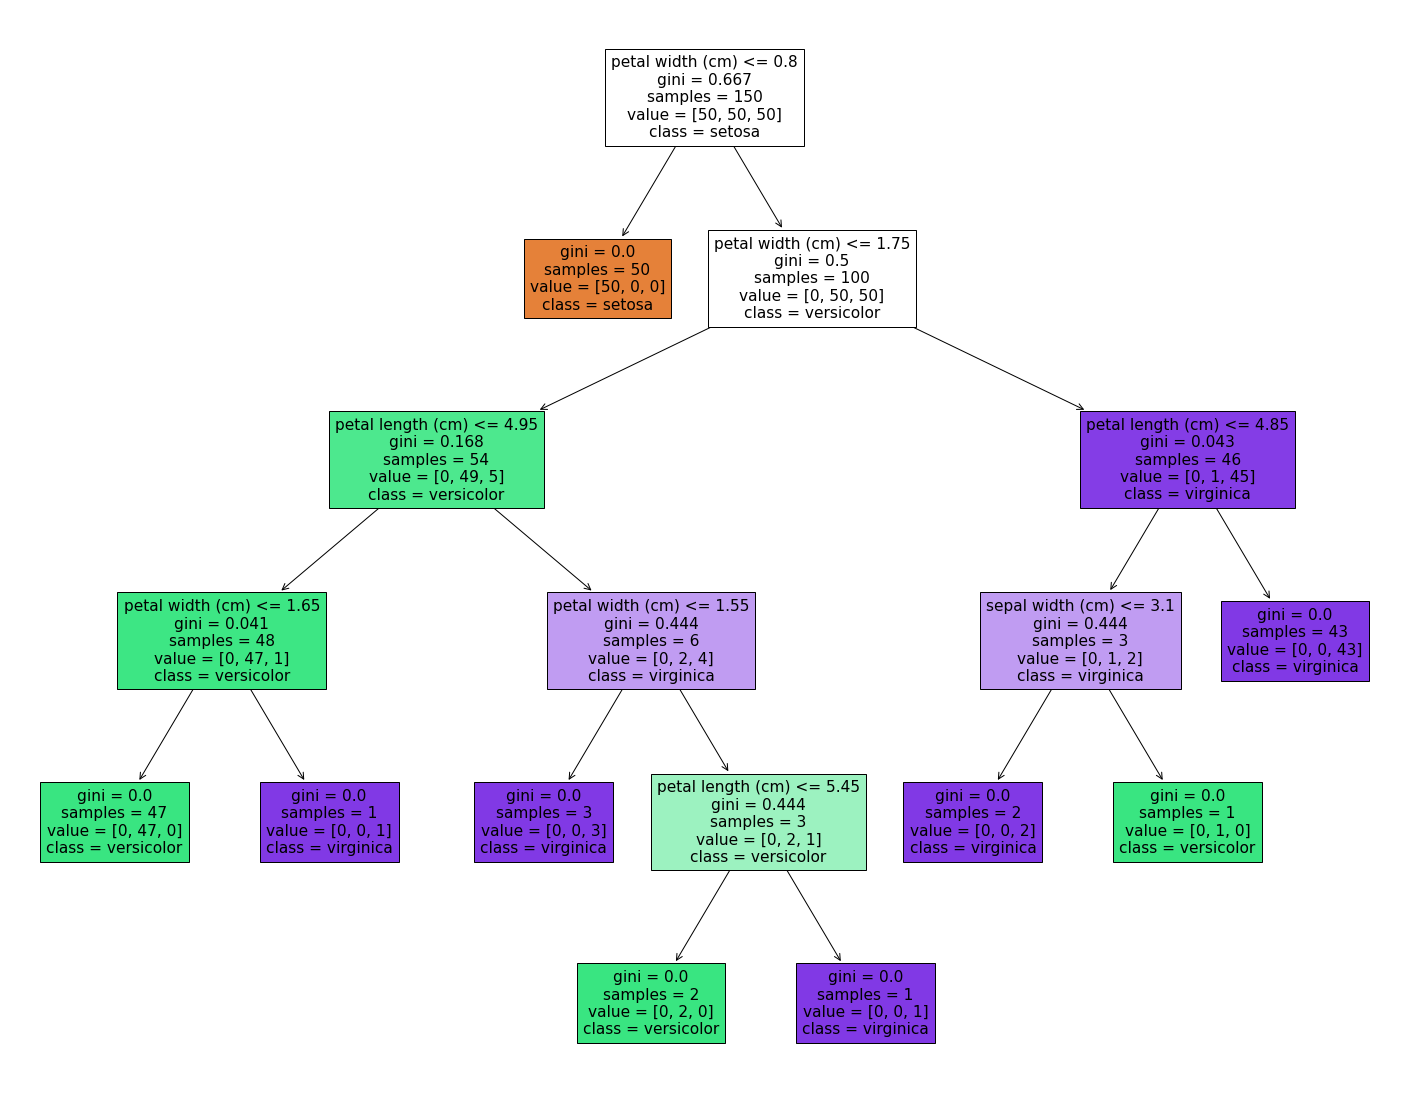

In [15]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,
                     filled=True)
#fig.savefig('decistion_tree.png')
#fig.savefig('decistion_tree.pdf')

In [16]:
model.feature_importances_ # Mais relevante para o random forest

array([0.        , 0.01333333, 0.06405596, 0.92261071])

## Exemplo

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np

df = pd.read_csv('allelectronics.csv', sep=';')
df = df.drop('RID', axis=1)
df

,age,income,student,credit_rating,class:buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [18]:
df['age'], age  = df['age'].factorize()
df['income'], income = df['income'].factorize()
df['student'], student = df['student'].factorize()
df['credit_rating'], credit_rating = df['credit_rating'].factorize()
df

,age,income,student,credit_rating,class:buys_computer
0,0,0,0,0,no
1,0,0,0,1,no
2,1,0,0,0,yes
3,2,1,0,0,yes
4,2,2,1,0,yes
5,2,2,1,1,no
6,1,2,1,1,yes
7,0,1,0,0,no
8,0,2,1,0,yes
9,2,1,1,0,yes


In [19]:
X = df.drop('class:buys_computer', axis=1)
X

,age,income,student,credit_rating
0,0,0,0,0
1,0,0,0,1
2,1,0,0,0
3,2,1,0,0
4,2,2,1,0
5,2,2,1,1
6,1,2,1,1
7,0,1,0,0
8,0,2,1,0
9,2,1,1,0


In [20]:
y = df[['class:buys_computer']]
y

,class:buys_computer
0,no
1,no
2,yes
3,yes
4,yes
5,no
6,yes
7,no
8,yes
9,yes


In [21]:
# Create decision tree classifier object
decisiontree = DecisionTreeClassifier()

# Train model
model = decisiontree.fit(X, y)

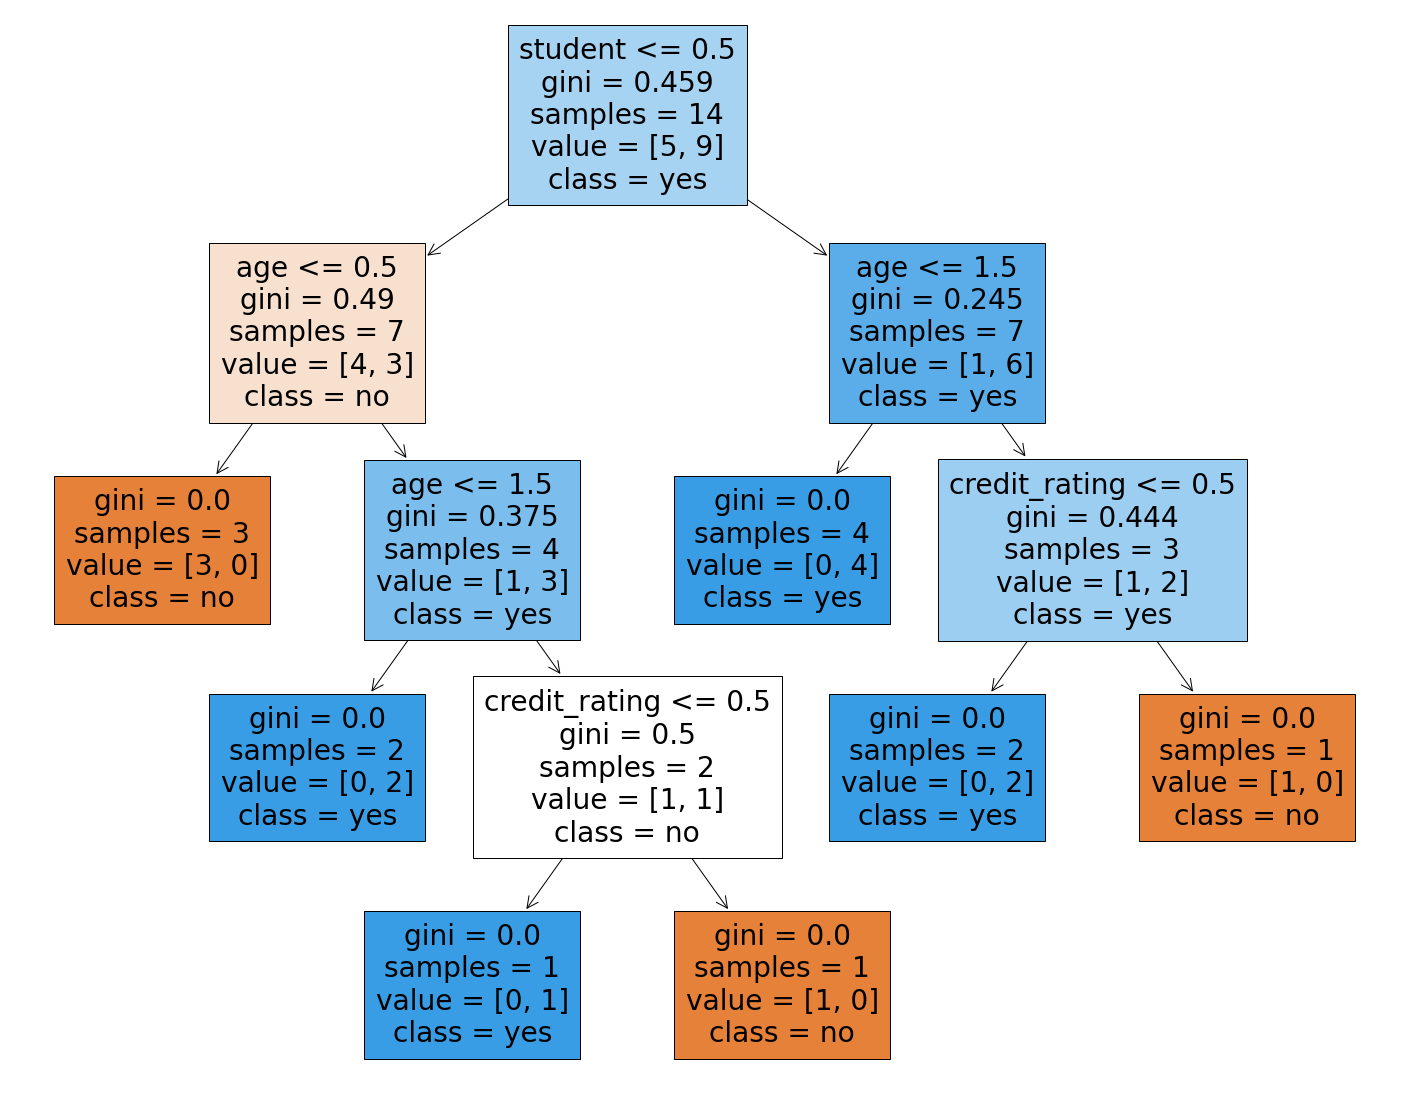

In [22]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                     feature_names= X.columns,  
                     class_names= np.unique(y),
                     filled=True)
#fig.savefig('decistion_tree.png')
#fig.savefig('decistion_tree.pdf')

In [23]:
age = {val: idx for idx,val in enumerate(age)}
income = {val: idx for idx,val in enumerate(income)}
student = {val: idx for idx,val in enumerate(student)}
credit_rating = {val: idx for idx,val in enumerate(credit_rating)}

In [24]:
age['youth']

0

In [25]:
# Fazer uma previsão
val = ['youth', 'low', 'yes', 'fair']

val=[age[val[0]], income[val[1]], student[val[2]], credit_rating[val[3]] ]
val

[0, 2, 1, 0]